## 1. Author papers and co-authorship

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
from collections import defaultdict

In [6]:
f_author_papers = open("../Data/author_papers.txt", "r")
list_lines = f_author_papers.readlines()
f_author_papers.close()

print('Read author_papers.txt with a number of lines: {0}. The size in memory of the resulting list: {1} bytes '.format(len(list_lines),sys.getsizeof(list_lines)))

Read author_papers.txt with a number of lines: 217801. The size in memory of the resulting list: 1784056 bytes 


In [7]:
edges_t = [(1,2),(2,4),(3,4)]
weight_t = {(1,2):2,(2,4):8,(3,4):12}
G_t = nx.Graph()
G_t.add_edges_from(edges_t)
print('non instantiated weight: ',G_t[1][2])
print(G_t.edges())
G_t[1][2]['weight'] = 1
print(G_t.edges(data=('weight')))
G_t[1][2]['weight'] += 1
print(G_t.edges(data=True))
G_t[2][1]['weight'] += 1
print(G_t.edges(data=True))
(1,2) in G_t.edges()
G_t.add_edge(5,2,weight=-1)
print(G_t.edges(data=True))

non instantiated weight:  {}
[(1, 2), (2, 4), (4, 3)]
[(1, 2, 1), (2, 4, None), (4, 3, None)]
[(1, 2, {'weight': 2}), (2, 4, {}), (4, 3, {})]
[(1, 2, {'weight': 3}), (2, 4, {}), (4, 3, {})]
[(1, 2, {'weight': 3}), (2, 4, {}), (2, 5, {'weight': -1}), (4, 3, {})]


In [8]:
dict_author_papers = defaultdict(list)
dict_paper_authors = defaultdict(list)

for line in list_lines:
    author, papers = line.split(':',1)
    author = int(author)
    papers = papers.replace('\n','').split('-')
    papers = list(map(int,papers))
    dict_author_papers[author] = papers
    for paper in papers:
        dict_paper_authors[paper].append(author)
              

print('Built dictionary{{author: papers}} of size {0}, with size in memory: {1} bytes'.format(len(dict_author_papers), sys.getsizeof(dict_author_papers)))
print('Built dictionary {{paper: authors}} of size {0}, with size in memory: {1} bytes'.format(len(dict_paper_authors), sys.getsizeof(dict_paper_authors)))

Built dictionary{author: papers} of size 217801, with size in memory: 10485872 bytes
Built dictionary {paper: authors} of size 683606, with size in memory: 20971624 bytes


In [10]:
if list_lines is not None:
    list_lines = None

print('The first 5 elements in the dictionary {{author: papers}}:')
count = 0
for key in dict_author_papers:
    if(count > 5):
        break
    print('{{{0}: {1}}}'.format(key,dict_author_papers[key]))
    count += 1
    
print('\nThe first 5 elements in the dictionary {{paper: authors}}:')
count = 0
for key in dict_paper_authors:
    if(count > 5):
        break
    print('{{{0}: {1}}}'.format(key,dict_paper_authors[key]))
    count += 1

The first 5 elements in the dictionary {{author: papers}}:
{1036332: [1510273386, 1827736641, 1588673897, 2252711322, 2123653597]}
{1101850: [133459021, 179719743, 2111787673, 2126488676, 31838995]}
{1336878: [2122092249, 2132109814, 2100271871, 2065672539, 2036413831]}
{1515524: [2141827797, 2127085795, 2013547785, 2138529788, 1994863898]}
{1606427: [1907724546]}
{2728936: [2114261446, 2042751882, 1912205781, 2059913822, 1905787154]}

The first 5 elements in the dictionary {{paper: authors}}:
{1510273386: [1036332, 2120372629]}
{1827736641: [1036332, 349218277, 2074625575, 2141682129]}
{1588673897: [1036332, 349218277, 2074625575, 2141682129, 2171005301]}
{2252711322: [1036332, 2035326238]}
{2123653597: [1036332, 2035326238]}
{133459021: [1101850]}


## 2. Author papers and co-authorship

In [3]:
G = nx.read_edgelist('../Data/coauthorship.edgelist', delimiter=' ', nodetype=int)
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

print('Number of nodes:', n_nodes)
print('Number of edges:', n_edges)

Number of nodes: 217801
Number of edges: 1718164


In [9]:
num_missing_edges = 0
num_verified_edges = 0
set_papers_missing_edges = []
dict_num_missing_edges = defaultdict(int)

for paper in dict_paper_authors:
    authors = dict_paper_authors[paper]
    for i in range(len(authors)):
        for j in range(i+1,len(authors)):
            if(G.has_edge(authors[i],authors[j])):
                if('co-authorship' not in G[authors[i]][authors[j]]):
                    G[authors[i]][authors[j]]['co-authorship'] = 1
                    num_verified_edges += 1
                else:
                    G[authors[i]][authors[j]]['co-authorship'] += 1
            else:
                num_missing_edges += 1
                set_papers_missing_edges.append(paper)
                dict_num_missing_edges[(authors[i],authors[j])] += 1
                
set_papers_missing_edges = set(set_papers_missing_edges)

Num of top-cited papers not considered:  1467986
Num of missing edges:  928043
Num of verified edges: 874503 out of 1718164
Max co-authorship of missing edges:  10
Min co-authorship of missing edges:  1


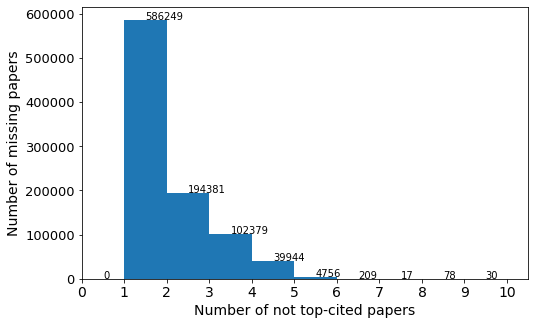

In [13]:
print('Num of top-cited papers not considered: ', num_missing_edges)
print('Num of missing edges: ', len(dict_num_missing_edges))
print('Num of verified edges: {0} out of {1}'.format(num_verified_edges,n_edges))
list_missing_edges = dict_num_missing_edges.values()
max_weight_missing_edges = max(list_missing_edges)
print('Max co-authorship of missing edges: ',max(list_missing_edges))
print('Min co-authorship of missing edges: ',min(list_missing_edges))

plt.figure(figsize=(8,5))
_,_,patches = plt.hist(list_missing_edges, bins=np.arange(0,max_weight_missing_edges+1))
plt.xlim([0.5, 10.5])
plt.xticks(np.arange(0,max_weight_missing_edges+1))
plt.xlabel('Number of not top-cited papers',fontsize=14)
plt.ylabel('Number of missing papers',fontsize=14)

for pp in patches:
    x = (pp._x0 + pp._x1)/2
    y = pp._y1 + 0.05
    plt.text(x, y, int(pp._y1))

plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.savefig("histogram_missing_not_top_cited_papers")

There are pairs of authors that have 10 top-cited articles but they are not related in the graph (the edge doesn't exist). We'll explore this phenomena in the next section.

In [133]:
print('Some of the edges after the addition of the weights:\n')
count = 0
for (u,v,d) in G.edges(data=True):
    if(count > 30):
        break
    print("({0},{1},{2}) = ".format(u,v,d))
    count += 1

Some of the edges after the addition of the weights:

(2002218453,1999212242,{}) = 
(2002218453,2032640503,{}) = 
(2002218453,2475931411,{}) = 
(2002218453,2477743428,{}) = 
(2002218453,2504846374,{}) = 
(2002218453,2597456557,{'co-authorship': 1}) = 
(2002218453,2598017501,{}) = 
(2002218453,2134271654,{}) = 
(2002218453,2138551865,{}) = 
(2002218453,2145694960,{}) = 
(2002218453,2196000661,{}) = 
(2002218453,2205806165,{}) = 
(2002218453,2209357149,{}) = 
(2002218453,2209740845,{}) = 
(2002218453,2241457235,{}) = 
(2002218453,2260426619,{}) = 
(2002218453,2524794028,{}) = 
(2002218453,2777594067,{}) = 
(1999212242,2475931411,{'co-authorship': 1}) = 
(1999212242,2504846374,{'co-authorship': 1}) = 
(1999212242,2597456557,{}) = 
(1999212242,2032640503,{}) = 
(1999212242,2598017501,{}) = 
(1999212242,2477743428,{'co-authorship': 1}) = 
(2032640503,2475931411,{}) = 
(2032640503,2504846374,{}) = 
(2032640503,1863879007,{}) = 
(2032640503,2336566022,{'co-authorship': 2}) = 
(2032640503,2109

## 3. Missing relationships

First, we'll see if the authors in the list of missing edges are in the graph (if the node exist) created from the *coauthorship.edgelist* file.

In [208]:
set_authors_missing_edges = set()
for edge in dict_missing_edges.keys():
    set_authors_missing_edges.update([edge[0],edge[1]])

num_missing_authors = 0
for author in set_authors_missing_edges:
    if(author not in G.nodes()):
        num_missing_authors += 1
    
print('Num of missing authors: ',num_missing_authors)

Num of missing authors:  0


Second, we'll check the presence of the papers associated to those missing edges in the *abstract.txt* file. We'll get the list of papers and turn it into a set for two reasons : (i) we don't want to have duplicated, and (ii) the membership test is faster for sets than for lists.

In [238]:
f_abstracts = open('../Data/abstracts.txt',encoding="utf8")
list_lines = f_abstracts.readlines()
f_abstracts.close()

print('Read abstracts.txt with a number of lines: {0}. The size in memory of the resulting list: {1} bytes '.format(len(list_lines),sys.getsizeof(list_lines)))

Read abstracts.txt with a number of lines: 624181. The size in memory of the resulting list: 5150400 bytes 


In [248]:
list_id_paper_abstracts = [int(line.split('----',1)[0]) for line in list_lines]
list_id_paper_authors = list(dict_paper_authors.keys())
set_id_paper_abstracts = set(list_id_paper_abstracts)
set_id_paper_authors = set(list_id_paper_authors)

In [249]:
num_papers_with_abstract = 0
for paper in set_id_paper_authors:
    if(paper in set_id_paper_abstracts):
        num_papers_with_abstract += 1
        
print('Num of papers in author_papers.txt with abstract: {0} out of {1} '.format(num_papers_with_abstract,len(dict_paper_authors)))

Num of papers in author_papers.txt with abstract: 624181 out of 683606 


So, each abstract in *abstracts.txt* belongs to a paper in *author_papers.txt* but not all papers in *author_papers.txt* have an astract in *abstracts.txt*. Finally, we will check if the papers that have an abstract contain the set of papers associated with the missing edges.

In [256]:
num_papers_abstract_missing_edge = 0
for paper in set_papers_missing_edges:
    if(paper in set_id_paper_abstracts):
        num_papers_abstract_missing_edge += 1
        
print('Num of papers with abstract that are not associated to an edge: {0} out of {1} '.format(num_papers_abstract_missing_edge,len(set_papers_missing_edges)))

Num of papers with abstract that are not associated to an edge: 1422623 out of 1467986 


In conclusion, we must add the instances of co-authorship to the graph and extract the characteristics of the result.

## 4. Graph features

First, we will create the weighted graph with the number of top-cited co-authored papers as weights (0 if the authors have worked on an paper that is not the top-cited).

In [292]:
G = nx.read_edgelist('../Data/coauthorship.edgelist', delimiter=' ', nodetype=int)
nx.set_edge_attributes(G, values = 0, name = 'coauthorship')

for paper in dict_paper_authors:
    authors = dict_paper_authors[paper]
    for i in range(len(authors)):
        for j in range(i+1,len(authors)):
            if(G.has_edge(authors[i],authors[j])):
                if('co-authorship' not in G[authors[i]][authors[j]]):
                    G[authors[i]][authors[j]]['coauthorship'] = 1
                    num_verified_edges += 1
                else:
                    G[authors[i]][authors[j]]['coauthorship'] += 1
            else:
                G.add_edge(authors[i],authors[j], coauthorship = 1)

G.remove_edges_from(nx.selfloop_edges(G))

Weighted denser graph saved


In [295]:
nx.write_edgelist(G, path='../Data/graph.weighted.edgelist', data=True)
print('Weighted dense graph saved')

Weighted dense graph saved


In [294]:
print('Some of the edges after the addition of the weights:\n')
count = 0
for (u,v,d) in G.edges(data=True):
    if(count > 30):
        break
    print("({0},{1},{2}) = ".format(u,v,d))
    count += 1

Some of the edges after the addition of the weights:

(2002218453,1999212242,{'coauthorship': 0}) = 
(2002218453,2032640503,{'coauthorship': 0}) = 
(2002218453,2475931411,{'coauthorship': 0}) = 
(2002218453,2477743428,{'coauthorship': 0}) = 
(2002218453,2504846374,{'coauthorship': 0}) = 
(2002218453,2597456557,{'coauthorship': 1}) = 
(2002218453,2598017501,{'coauthorship': 0}) = 
(2002218453,2134271654,{'coauthorship': 0}) = 
(2002218453,2138551865,{'coauthorship': 0}) = 
(2002218453,2145694960,{'coauthorship': 0}) = 
(2002218453,2196000661,{'coauthorship': 0}) = 
(2002218453,2205806165,{'coauthorship': 0}) = 
(2002218453,2209357149,{'coauthorship': 0}) = 
(2002218453,2209740845,{'coauthorship': 0}) = 
(2002218453,2241457235,{'coauthorship': 0}) = 
(2002218453,2260426619,{'coauthorship': 0}) = 
(2002218453,2524794028,{'coauthorship': 0}) = 
(2002218453,2777594067,{'coauthorship': 0}) = 
(2002218453,2056789095,{'coauthorship': 1}) = 
(1999212242,2475931411,{'coauthorship': 1}) = 
(19992

In [293]:
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

print('Number of nodes:', n_nodes)
print('Number of edges:', n_edges)
print('Some of the edges after the addition of the weights:\n')
count = 0
for (u,v,d) in G.edges(data=True):
    if(count > 30):
        break
    print("({0},{1},{2})".format(u,v,d))
    count += 1

Number of nodes: 217801
Number of edges: 2640752
Some of the edges after the addition of the weights:

(2002218453,1999212242,{'coauthorship': 0})
(2002218453,2032640503,{'coauthorship': 0})
(2002218453,2475931411,{'coauthorship': 0})
(2002218453,2477743428,{'coauthorship': 0})
(2002218453,2504846374,{'coauthorship': 0})
(2002218453,2597456557,{'coauthorship': 1})
(2002218453,2598017501,{'coauthorship': 0})
(2002218453,2134271654,{'coauthorship': 0})
(2002218453,2138551865,{'coauthorship': 0})
(2002218453,2145694960,{'coauthorship': 0})
(2002218453,2196000661,{'coauthorship': 0})
(2002218453,2205806165,{'coauthorship': 0})
(2002218453,2209357149,{'coauthorship': 0})
(2002218453,2209740845,{'coauthorship': 0})
(2002218453,2241457235,{'coauthorship': 0})
(2002218453,2260426619,{'coauthorship': 0})
(2002218453,2524794028,{'coauthorship': 0})
(2002218453,2777594067,{'coauthorship': 0})
(2002218453,2056789095,{'coauthorship': 1})
(1999212242,2475931411,{'coauthorship': 1})
(1999212242,25048

Second, we'll extract the graph features and saved them in a file called *graph_features.csv*.

In [7]:
# computes structural features for each node
degree = nx.degree(G)
weighted_degree = nx.degree(G,weight='coauthorship')

In [271]:
core_number = nx.core_number(G)

In [8]:
onion_number = nx.onion_layers(G)

In [274]:
clustering_coef = nx.clustering(G)

In [280]:
clustering_coef_coauthorship = nx.clustering(G,weight='coauthorship')

In [272]:
betweeness_coef = nx.betweenness_centrality(G, k=256)

In [285]:
betweeness_coef_coauthorship = nx.betweenness_centrality(G, k=256, weight='coauthorship')

In [273]:
centrality = nx.eigenvector_centrality(G)

In [282]:
centrality_coauthorship = nx.eigenvector_centrality(G,weight='coauthorship')

In [287]:
page_rank = nx.pagerank(G, alpha=0.7)

In [289]:
page_rank_coauthorship = nx.pagerank(G,alpha=0.7,weight='coauthorship')

In [290]:
graph_features = pd.DataFrame()
list_nodes = list(G.nodes())

graph_features["author_id"] = list_nodes

# features of the non-weighted graph
graph_features['core_number'] = [core_number[node] for node in list_nodes]

graph_features['clustering_coef'] = [clustering_coef[node] for node in list_nodes]
graph_features['betweeness_coef'] = [betweeness_coef[node] for node in list_nodes]
graph_features['centrality'] = [centrality[node] for node in list_nodes]
graph_features['page_rank'] = [page_rank[node] for node in list_nodes]

# features of the weighted graph
graph_features['clustering_coef_coauthorship'] = [clustering_coef_coauthorship[node] for node in list_nodes]
graph_features['betweeness_coef_coauthorship'] = [betweeness_coef_coauthorship[node] for node in list_nodes]
graph_features['centrality_coauthorship'] = [centrality_coauthorship[node] for node in list_nodes]
graph_features['page_rank_coauthorship'] = [page_rank_coauthorship[node] for node in list_nodes]

graph_features.to_csv("../Data/graph_features.csv",index=False)

### 5. Extracting other graph features

To the previous graph features we'all the degree, the weighted degree and the onion number (alternative to the core number). This second version will be used to train all the models, specially the LightGBM. The first version will be used with the Feed-Forward Neural Network model. 

In [5]:
# read the version 1 of the edge list
G = nx.read_edgelist('../Data/coauthorship.edgelist', delimiter=' ', nodetype=int)
list_nodes = list(G.nodes())

In [9]:
# read the version 1 of graph features
dict_dtype = {'author_id':np.int64,'core_number':np.float32,'clustering_coef':np.float32,
             'betweeness_coef':np.float32,'centrality':np.float32,'page_rank':np.float32,
              'clustering_coef_coauthorship':np.float32,'betweeness_coef_coauthorship':np.float32,
              'centrality_coauthorship':np.float32,'page_rank_coauthorship':np.float32}
graph_features=pd.read_csv("../Data/graph_features.csv", dtype=dict_dtype)

# add the new features
graph_features['degree'] = [degree[node] for node in list_nodes]
graph_features['onion_number'] = [onion_number[node] for node in list_nodes]
graph_features['weighted_degree'] = [weighted_degree[node] for node in list_nodes]

# save the version 2 of graph features
graph_features.to_csv("..Data/graph_features_v2.csv",index=False)